### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — стохастический, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и разобраться как подбирать гиперпараметры для этих методов.

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле  `utils.py`:

**Задание 1.1. (0.5 балла)** Полный градиентный спуск **GradientDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

**Задание 1.2. (1 балл)** Стохастический градиентный спуск **StochasticDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$ 

$\nabla_{w} q_{i_{k}}(w_{k}) \,$ - это оценка градиента по батчу объектов, выбранных случайно.

**Задание 1.3. (1 балл)** Метод Momentum **MomentumDescent**:

$$
    h_0 = 0, \\
    h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

**Задание 1.4. (1 балл)** Метод Adaptive gradient algorithm **Adagrad**:

$$
    G_0 = 0, \\
    G_{k + 1} = G_{k} + \left(\nabla_{w} Q(w_{k})\right) ^ 2, \\
    w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\varepsilon + G_{k + 1}}} \nabla_{w} Q(w_{k}).
$$


Во всех вышеназванных методах мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$
На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

Мы будем использовать функцию потерь MSE:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2
$$

Все вычисления должны быть векторизованы.

## Задание 2. Реализация линейной регресии (1.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `utils.py` - **LinearRegression**.

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы.
* Циклы средствами python допускаются только для итераций градиентного спуска.
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`.
    * Достижение максимального числа итераций `max_iter`.
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту).
* Инициализировать веса нужно нулевым вектором или из нормального $\mathcal{N}(0, 1)$ распределения (тогда нужно зафиксировать seed).

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from utils import (
    Adagrad,
    GradientDescent,
    MomentumDescent,
    StochasticDescent,
)
from utils import LinearRegression

In [32]:
from haversine import haversine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats
from sklearn.metrics import mean_squared_error as mse
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
import os 
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.base import BaseEstimator
import random

In [4]:
num_objects = 100
dimension = 5

X = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

lambda_ = 1e-2
w0 = np.zeros(dimension)

max_iter = 10
tolerance = 0

In [5]:
s0_default: float = 1
p_default: float = 0.5

batch_size_default: int = 1

alpha_default: float = 0.1
eps_default: float = 1e-8

mu_default = 1e-2

tolerance_default: float = 1e-3
max_iter_default: int = 1000

In [17]:
class BaseDescent:
    """
    A base class and examples for all functions
    """

    def __init__(self):
        self.w = None

    def step(self, X: np.ndarray, y: np.ndarray, iteration: int) -> np.ndarray:
        """
        Descent step
        :param iteration: iteration number
        :param X: objects' features
        :param y: objects' targets
        :return: difference between weights
        """
        return self.update_weights(self.calc_gradient(X, y), iteration)

    def update_weights(self, gradient: np.ndarray, iteration: int) -> np.ndarray:
        """
        Example for update_weights function
        :param iteration: iteration number
        :param gradient: gradient
        :return: weight difference: np.ndarray
        """
        pass


    def calc_gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Example for calc_gradient function
        :param X: objects' features
        :param y: objects' targets
        :return: gradient: np.ndarray
        """
        pass

In [18]:
class GradientDescent(BaseDescent):
    """
    Full gradient descent class
    """

    def __init__(self, w0: np.ndarray, lambda_: float, s0: float = s0_default, p: float = p_default):
        """
        :param w0: weight initialization
        :param lambda_: learning rate parameter (float)
        :param s0: learning rate parameter (float)
        :param p: learning rate parameter (float)
        """
        super().__init__()
        self.eta = lambda k: lambda_ * (s0 / (s0 + k)) ** p
        self.w = np.copy(w0)

    def update_weights(self, gradient: np.ndarray, iteration: int) -> np.ndarray:
        """
        Changing weights with respect to gradient
        :param iteration: iteration number
        :param gradient: gradient
        :return: weight difference: np.ndarray
        """
        # TODO: implement updating weights function
        for i in range(iteration):
            step = self.eta(iteration) * calc_gradient(X, y)
            self.w -= step
        return self.w

    def calc_gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Getting objects, calculating gradient at point w
        :param X: objects' features
        :param y: objects' targets
        :return: gradient: np.ndarray
        """
        # TODO: implement calculating gradient function
        return (X@self.w-y)@X /(len(y))

In [24]:
# GradientDescent

descent = GradientDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient1.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [23]:
gradient, diff

(array([-0.26970026, -0.29052939, -0.27212714, -0.27230177, -0.26312854]),
 array([0., 0., 0., 0., 0.]))

In [39]:
class StochasticDescent(BaseDescent):
    """
    Stochastic gradient descent class
    """

    def __init__(self, w0: np.ndarray, lambda_: float, s0: float = s0_default, p: float = p_default,
                 batch_size: int = batch_size_default):
        """
        :param w0: weight initialization
        :param lambda_: learning rate parameter (float)
        :param s0: learning rate parameter (float)
        :param p: learning rate parameter (float)
        :param batch_size: batch size (int)
        """
        super().__init__()
        self.eta = lambda k: lambda_ * (s0 / (s0 + k)) ** p
        self.batch_size = batch_size
        self.loss_history = []
        self.w = np.copy(w0)

    def update_weights(self, gradient: np.ndarray, iteration: int) -> np.ndarray:
        """
        Changing weights with respect to gradient
        :param iteration: iteration number
        :param gradient: gradient estimate
        :return: weight difference: np.ndarray
        """
        # TODO: implement updating weights function
        for i in range(iteration):
            random_indexes = random.sample([i for i in range(len(y))], self.batch_size)
            step = self.eta(iteraton)*self.calc_gradient(X[random_indexes], y[random_indexes]) 
            self.w -= step
            self.loss_history.append(mse(X@self.w, y))
        return self.w

    def calc_gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Getting objects, calculating gradient at point w
        :param X: objects' features
        :param y: objects' targets
        :return: gradient: np.ndarray
        """
        # TODO: implement calculating gradient function
        return (X@self.w-y)@X /(len(y))

In [40]:
# StochasticDescent

descent = StochasticDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [42]:
gradient, diff

(array([-0.26970026, -0.29052939, -0.27212714, -0.27230177, -0.26312854]),
 array([0., 0., 0., 0., 0.]))

In [43]:
class MomentumDescent(BaseDescent):
    """
    Momentum gradient descent class
    """

    def __init__(self, w0: np.ndarray, lambda_: float, alpha: float = alpha_default, s0: float = s0_default,
                 p: float = p_default):
        """
        :param w0: weight initialization
        :param lambda_: learning rate parameter (float)
        :param alpha: momentum coefficient
        :param s0: learning rate parameter (float)
        :param p: learning rate parameter (float)
        """
        super().__init__()
        self.eta = lambda k: lambda_ * (s0 / (s0 + k)) ** p
        self.alpha = alpha
        self.w = np.copy(w0)
        self.h = 0

    def update_weights(self, gradient: np.ndarray, iteration: int) -> np.ndarray:
        """
        Changing weights with respect to gradient
        :param iteration: iteration number
        :param gradient: gradient estimate
        :return: weight difference: np.ndarray
        """
        for i in range(iteration):
            self.h = self.h*self.alpha + self.eta(iteraton)*self.calc_gradient(X, y)
            self.w -= self.h
        return self.w

    def calc_gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Getting objects, calculating gradient at point w
        :param X: objects' features
        :param y: objects' targets
        :return: gradient: np.ndarray
        """
        # TODO: implement calculating gradient function
        return (X@self.w-y)@X /(len(y))

In [44]:
# MomentumDescent

descent = MomentumDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [45]:
gradient, diff

(array([-0.26970026, -0.29052939, -0.27212714, -0.27230177, -0.26312854]),
 array([0., 0., 0., 0., 0.]))

In [46]:
class Adagrad(BaseDescent):
    """
    Adaptive gradient algorithm class
    """

    def __init__(self, w0: np.ndarray, lambda_: float, eps: float = eps_default, s0: float = s0_default,
                 p: float = p_default):
        """
        :param w0: weight initialization
        :param lambda_: learning rate parameter (float)
        :param eps: smoothing term (float)
        :param s0: learning rate parameter (float)
        :param p: learning rate parameter (float)
        """
        super().__init__()
        self.eta = lambda k: lambda_ * (s0 / (s0 + k)) ** p
        self.eps = eps
        self.w = np.copy(w0)
        self.g = 0

    def update_weights(self, gradient: np.ndarray, iteration: int) -> np.ndarray:
        """
        Changing weights with respect to gradient
        :param iteration: iteration number
        :param gradient: gradient estimate
        :return: weight difference: np.ndarray
        """
        # TODO: implement updating weights function
        self.g = np.zeros(np.shape(y))
        for i in range(iteration):
            random_indexes = random.sample([i for i in range(len(y))], self.batch_size)
            self.g += calc_gradient(X[random_indexes], y[random_indexes]) ** 2
            self.w -= self.eta(iteration) / ((self.g + self.eps)**0.5) * calc_gradient(X[random_indexes], y[random_indexes])
        return self.w      

    def calc_gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """
        Getting objects, calculating gradient at point w
        :param X: objects' features
        :param y: objects' targets
        :return: gradient: np.ndarray
        """
        # TODO: implement calculating gradient function
        return (X@self.w-y)@X /(len(y))

In [49]:
# Adagrad

descent = Adagrad(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [50]:
gradient, diff

(array([-0.26970026, -0.29052939, -0.27212714, -0.27230177, -0.26312854]),
 array([0., 0., 0., 0., 0.]))

In [101]:
class LinearReg(BaseEstimator):
    def __init__(self,
                 gd_type='stochastic', 
                 tolerance=tolerance_default,
                 max_iter=max_iter_default,
                 w0=None,
                 eta=1e-2,
                 batch_size: int = batch_size_default):
        """
        gd_type: 'full' or 'stochastic'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) - init weights
        eta: learning rate
        alpha: momentum coefficient
        """
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w = w0 
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
        self.batch_size = batch_size
        self.real_iter = 0

    def fit(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: self
        """
        X = sm.add_constant(X)
        
        if self.w==None:
            self.w=np.zeros(np.size(X,1))

        self.loss_history = []

        if self.gd_type == 'full':
            
            for i in range(self.max_iter):
                step=self.eta*self.calc_gradient(X,y) 
                w1=self.w.copy()
                self.w -= step
                self.loss_history.append(self.calc_loss(X, y))
                if np.linalg.norm(w1-self.w) < self.tolerance: 
                    break
        
        else:
            
            for i in range(self.max_iter):
                self.real_iter += 1
                random_indexes = random.sample([range(len(y))], self.batch_size)
                step=self.eta*self.calc_gradient(X[random_indexes], y[random_indexes])  
                w1=self.w.copy()
                self.w = self.w-step
                self.loss_history.append(self.calc_loss(X, y))
                if np.linalg.norm(w1-self.w) < self.tolerance:
                    break

        return self
    
    def predict(self, X):
        X = sm.add_constant(X)
        if self.w is None:
            raise Exception('Not trained yet')
        
        return X.dot(self.w)
    
    def calc_gradient(self, X, y):
        """
        y: np.array of shape (ell)
        ---
        output: np.array of shape (d)
        """
        return X.T.dot(X.dot(self.w)-y)/np.size(y)

    def calc_loss(self, X, y):
        """
        X: np.array of shape (ell, d)
        y: np.array of shape (ell)
        ---
        output: float 
        """
        return mse(X@self.w, y)

In [102]:
import seaborn as sns

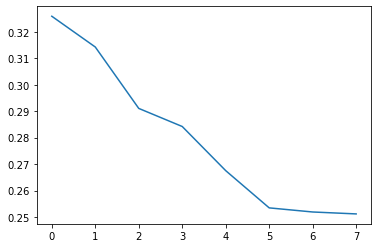

In [104]:
sg=LinearReg(eta=0.01, batch_size=1, tolerance=0.001).fit(X, y)
sg

sns.lineplot(x=np.arange(sg.real_iter), y=sg.loss_history);

## Задание 4. Работа с данными (1 балл)

In [115]:
from sklearn.base import BaseEstimator, TransformerMixin
class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, x1,y1,x2,y2,xc,yc):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
        self.xc = xc
        self.yc = yc


    def fit_transform(self, df):
        x_grid = np.linspace(self.x1, self.x2, self.xc)
        y_grid = np.linspace(self.y1, self.y2, self.yc)
        last_x = len(x_grid)
        last_y = len(y_grid)
        
        X = df.copy()

        X['x_cell'] = X['pickup_longitude'].apply(lambda x: np.searchsorted(x_grid, x))
        X['y_cell'] = X['pickup_latitude'].apply(lambda x: np.searchsorted(y_grid, x))
        X['pickup_position'] = X.apply(lambda row: -1 if (row['x_cell']== 0 or row['y_cell']==0 or row['y_cell']==last_y or row['x_cell']==last_x) \
                                            else (row['y_cell'] * (self.xc-1) + row['x_cell']), axis=1)
        
        X['x_cell'] = X['dropoff_longitude'].apply(lambda x: np.searchsorted(x_grid, x))
        X['y_cell'] = X['dropoff_latitude'].apply(lambda x: np.searchsorted(y_grid, x))
        X['dropoff_position'] = X.apply(lambda row: -1 if (row['x_cell']== 0 or row['y_cell']==0 or row['y_cell']==last_y or row['x_cell']==last_x) \
                                            else (row['y_cell'] * (self.xc-1) + row['x_cell']), axis=1)       
        
        return X.drop(['x_cell', 'y_cell'], axis=1)

In [ ]:
%%time
df = pd.read_csv('../homework2/train.csv')
df['log_trip_duration']=np.log1p(df['trip_duration'])

df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

df['hour']=df['pickup_datetime'].dt.hour
df['weekday']=df['pickup_datetime'].dt.weekday
df['day']=df['pickup_datetime'].dt.date
df['daypor']=df['pickup_datetime'].dt.dayofyear
df['month']=df['pickup_datetime'].dt.month


hour = df['hour']
df['free_road'] = ((hour > 3) & (hour < 7)).map(int)
df['traffic_jam'] = ((hour > 9) & (hour < 15)).map(int)

df['Kennedi_pickup'] = df.apply(lambda x: int(((40.633191)<=(x['pickup_latitude'])<=(40.660043))&((-73.793316)<= (x['pickup_longitude']) <=(-73.780070))), axis=1)
df['Kennedi_dropoff'] = df.apply(lambda x: int(((40.633191)<=(x['dropoff_latitude'])<=(40.660043))&((-73.793316)<= (x['dropoff_longitude']) <=(-73.780070))), axis=1)

df['Laguardia_pickup'] = df.apply(lambda x: int(((40.766937)<=(x['pickup_latitude'])<=(40.779799))&((-73.877414)<= (x['pickup_longitude']) <=(-73.8628986))), axis=1)
df['Laguardia_dropoff'] = df.apply(lambda x: int(((40.766937)<=(x['dropoff_latitude'])<=(40.779799))&((-73.897414)<= (x['dropoff_longitude']) <=(-73.8622986))), axis=1)

Mytransformer = MapGridTransformer(-74.014901, 40.701559, -73.930014, 40.801323, 5, 6)
df = Mytransformer.fit_transform(df)

popular_track = df[['dropoff_position', 'pickup_position']].value_counts().index[:30]
df['popular_track'] = df.apply(lambda row: (str(row['dropoff_position']) + str(',') + str(row['pickup_position'])) \
                                                                        if (row['pickup_position'], row['dropoff_position']) in popular_track else str(-1), axis=1)

X_train, X_test = train_test_split(df, test_size=0.3, random_state=0)

categorical = ['month', 'weekday', 'hour', 'free_road', 'traffic_jam', 'Kennedi_pickup', 'Kennedi_dropoff', 'Laguardia_pickup', 'Laguardia_dropoff', 'dropoff_position', 'pickup_position', 'popular_track' ]
numeric_features = ['daypor']
features=numeric_features+categorical

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[features])
X_test_scaled = scaler.fit_transform(X_test[features])

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

* **Задание 5.1. (1.5 балла)** Подберите по валидационной выборке наилучшую длину $\lambda$ шага для каждого метода. Для этого можно сделать перебор по логарифмической сетке, так как нас интересует скорее порядок величины, нежели её точное значение. Сравните качество методов по метрикам MSE и R^2 на обучающей и тестовой выборках, сравните количество итераций до сходимости. Все параметры кроме $\lambda$ стоит выставить равным значениям по умолчанию.

* **Задание 5.2. (0.5 балла)** Постройте график зависимости значения функции ошибки от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты. Сравните методы между собой.

In [ ]:
columns = ['eta', 'test_mse', 'test_r2', 'train_mse', 'train_r2']
full_df = pd.DataFrame(columns=columns)
sg_df = pd.DataFrame(columns=columns)


for i in np.logspace(-2, 0, 7):
    print(i)
    #full gd
    gd_full=LinearReg(gd_type='full', eta=i).fit(X_train_scaled, X_train['log_trip_duration'].to_numpy())

    y_train_pred = gd_full.predict(X_train_scaled)
    y_pred = gd_full.predict(X_test_scaled)
    
    test_mse = mse(X_test['log_trip_duration'], y_pred)
    test_r2 = r2_score(X_test['log_trip_duration'], y_pred)
    train_mse = mse(X_train['log_trip_duration'], y_train_pred)
    train_r2 = r2_score(X_train['log_trip_duration'], y_train_pred)
    
    temp_test_df = pd.DataFrame({'eta':[0.1*(10**(-i))],
                            'test_mse': [test_mse],
                       'test_r2': [-test_r2],
                       'train_mse': [train_mse],
                       'train_r2': [-train_r2]})
    
    full_df = pd.concat([full_df, temp_test_df], ignore_index=True)
    
    sg_full=LinearReg(eta=i, batch_size=1000).fit(X_train_scaled, X_train['log_trip_duration'].to_numpy())
    
    y_train_pred = sg_full.predict(X_train_scaled)
    y_pred = sg_full.predict(X_test_scaled)
    
    test_mse = mse(X_test['log_trip_duration'], y_pred)
    test_r2 = r2_score(X_test['log_trip_duration'], y_pred)
    train_mse = mse(X_train['log_trip_duration'], y_train_pred)
    train_r2 = r2_score(X_train['log_trip_duration'], y_train_pred)
    
    temp_test_df = pd.DataFrame({'eta':[0.1*(10**(-i))],
                            'test_mse': [test_mse],
                       'test_r2': [-test_r2],
                       'train_mse': [train_mse],
                       'train_r2': [-train_r2]})
    
    sg_df = pd.concat([sg_df, temp_test_df], ignore_index=True)
    
    
full_df

In [ ]:
sg_df

## Задание 6. Сходимость стохастического градиентного спуска в зависимости от размера батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k) стохастического градиентного спуска на обучающей выборке для каждого размера батча из списка. Замерьте время и количество итераций до сходимости. Посчитайте среднее и дисперсию этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [ ]:
batch_sizes = np.arange(5, 500, 50)

columns = ['batch_size', 'iter_count', 'test_mse', 'test_r2', 'train_mse', 'train_r2']
sg_df = pd.DataFrame(columns=columns)


for batch_size in batch_sizes:
    print(batch_size)
    for i in range(5):

        sg_full=LinearReg(eta=1e-3, batch_size=batch_size).fit(X_train_scaled, X_train['log_trip_duration'].to_numpy())

        y_train_pred = sg_full.predict(X_train_scaled)
        y_pred = sg_full.predict(X_test_scaled)

        test_mse = mse(X_test['log_trip_duration'], y_pred)
        test_r2 = r2_score(X_test['log_trip_duration'], y_pred)
        train_mse = mse(X_train['log_trip_duration'], y_train_pred)
        train_r2 = r2_score(X_train['log_trip_duration'], y_train_pred)

        temp_test_df = pd.DataFrame({'batch_size':[batch_size],
                                     'iter_count': [sg_full.real_iter],
                                     'test_mse': [test_mse],
                                     'test_r2': [-test_r2],
                                     'train_mse': [train_mse],
                                     'train_r2': [-train_r2]})

        sg_df = pd.concat([sg_df, temp_test_df], ignore_index=True)
    
    
sg_df